<a href="https://colab.research.google.com/github/perses08/IMDB_classification-nlp-/blob/main/imdb_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!python --version

from tensorflow.keras import layers as l
import tensorflow as tf 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow_datasets as tfds

print(tf.__version__)

Python 3.6.9
2.3.0


In [3]:
imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete15I61T/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete15I61T/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete15I61T/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [34]:
import numpy as np

train_data = imdb['train']
test_data = imdb['test']

train_dataset = []
train_labels = []

test_dataset = []
test_labels = []


for i,j in train_data:
  train_dataset.append(str(i.numpy()))
  train_labels.append(j.numpy())

for i,j in test_data:
  test_dataset.append(str(i.numpy()))
  test_labels.append(j.numpy())

train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [35]:
token = Tokenizer(num_words=10000,oov_token='<OOV>')
token.fit_on_texts(train_dataset)

train_sequences = token.texts_to_sequences(train_dataset)
test_sequences = token.texts_to_sequences(test_dataset)

train_padded = pad_sequences(train_sequences,maxlen=120,truncating='post')
test_padded = pad_sequences(test_sequences,maxlen=120,truncating='post')

In [36]:
test_padded[0]

array([  59,   44,   25,  109,   13,   97, 4115,   16,  742, 4370,   10,
         14,  316,    5,    2,  593,  354,   16, 1864, 1212,    1,   16,
        680, 7499, 5595,    1,  773,    6,   13, 1037,    1,    1,  439,
        491,    1,    4,    1,  334, 3610,   20,  229,    3,   15, 5796,
          3,   15, 1646,   15,  102,    5,    2, 3597,  101,   11, 1450,
       1528,   12,  251,  235,   11,  216,    2,  377, 6429,    3,   62,
         95,   11,  174,  105,   11, 1528,  180,   12,  251,   37,    6,
       1144,    1,  682,    7, 4452,    1,    4,    1,  334,    7,   37,
       8367,  377,    5, 1420,    1,   13,   30,   64,   28,    6,  874,
        181,   17,    4, 1050,    5,   12,  224,    3,   83,    4,  353,
         33,  353, 5229,    5,   10,    6, 1340, 1160,    2, 5738],
      dtype=int32)

In [37]:
model = tf.keras.Sequential([
                             l.Embedding(10000,64,input_length=120),
                             l.Bidirectional(l.GRU(32)),
                             l.Dense(16,activation='relu'),
                             l.Dense(1,activation='sigmoid')
])

In [38]:
model.compile(loss = 'binary_crossentropy', optimizer= 'adam',metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 120, 64)           640000    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 64)                18816     
_________________________________________________________________
dense_10 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 659,873
Trainable params: 659,873
Non-trainable params: 0
_________________________________________________________________


In [39]:
history = model.fit(train_padded, train_labels, epochs=50, validation_data=(test_padded, test_labels))

Epoch 1/50
782/782 [==============================] - 19s 24ms/step - loss: 0.5029 - accuracy: 0.7309 - val_loss: 0.4029 - val_accuracy: 0.8182
Epoch 2/50
782/782 [==============================] - 18s 23ms/step - loss: 0.2896 - accuracy: 0.8810 - val_loss: 0.4275 - val_accuracy: 0.8128
Epoch 3/50
782/782 [==============================] - 18s 23ms/step - loss: 0.1970 - accuracy: 0.9246 - val_loss: 0.4612 - val_accuracy: 0.8241
Epoch 4/50
782/782 [==============================] - 18s 23ms/step - loss: 0.1159 - accuracy: 0.9593 - val_loss: 0.6022 - val_accuracy: 0.8114
Epoch 5/50
782/782 [==============================] - 18s 24ms/step - loss: 0.0645 - accuracy: 0.9781 - val_loss: 0.7268 - val_accuracy: 0.8052
Epoch 6/50
782/782 [==============================] - 18s 23ms/step - loss: 0.0388 - accuracy: 0.9873 - val_loss: 0.8869 - val_accuracy: 0.8015
Epoch 7/50
782/782 [==============================] - 18s 23ms/step - loss: 0.0232 - accuracy: 0.9925 - val_loss: 0.9384 - val_accuracy:

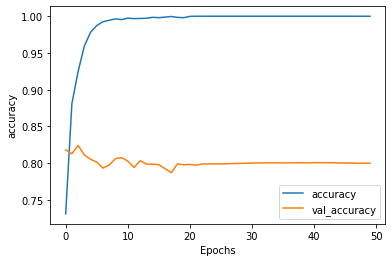

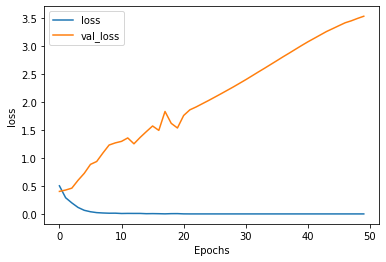

In [40]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
# Model Definition with Conv1D
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()